### WTH预测

In [1]:
from exp.exp_informer import Exp_Informer
from informer_paddle.wth_args import get_wth_args_nb

args = get_wth_args_nb()
setting = "2024-09-12_05_07_informer_WTH_small_M_prob_timeF_0"
exp = Exp_Informer(args)

🔣 args:{'model': 'informer', 'data': 'WTH_small', 'root_path': 'd:/data/', 'data_path': 'WTH_small.csv', 'features': 'M', 'target': 'WetBulbCelsius', 'freq': 'h', 'checkpoints': 'd:/checkpoints/', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 12, 'dec_in': 12, 'c_out': 12, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 's_layers': '3,2,1', 'd_ff': 2048, 'factor': 5, 'padding': 0, 'distil': True, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'output_attention': True, 'mix': True, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'batch_size': 32, 'patience': 4, 'learning_rate': 0.0001, 'des': 'test', 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'inverse': False, 'use_gpu': False, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3', 'detail_freq': 'h'}
🏿Use CPU:Place(cpu)


In [3]:
exp.predict(setting, True)
print('🔚' * 10)
# np.savetxt(folder_path + 'real_prediction.csv', preds, delimiter=',')

📑_get_data处理结束,flag:【pred】,data_set.length:【1】


ValueError: Expected 1D or 2D array, got 3D array instead

### 读取已保存数据

In [6]:
import numpy as np

prediction = np.load('./results/' + setting + '/real_prediction.npy')
print(prediction.shape)
print(prediction)

(1, 24, 12)
[[[ 0.1191076   0.5311123   0.7267205   0.7311872   0.8456306
    1.0906717   0.11998724 -0.03739012 -0.14647008  1.3762441
    1.3838394   0.8612677 ]
  [ 0.22258739  0.44990247  0.5935251   0.82807493  1.1335006
    1.1852225   0.2290264  -0.07558943 -0.14156519  1.4604281
    1.4222789   0.9225008 ]
  [ 0.22799191  0.41477513  0.5593875   0.84387994  1.1363437
    1.1619807   0.27955732 -0.10339678 -0.15094185  1.4912437
    1.4530463   0.87389094]
  [ 0.2504832   0.5101847   0.55757403  0.8033845   1.0278053
    1.13108     0.19055839 -0.02903165 -0.21673931  1.4398175
    1.3975157   0.8444636 ]
  [ 0.2710421   0.45779547  0.55811447  0.7803377   1.0074406
    1.1238548   0.19556573 -0.11850131 -0.19719692  1.4540373
    1.4472581   0.8162627 ]
  [ 0.28672844  0.421323    0.5183594   0.7632657   1.0100293
    1.1073638   0.224722   -0.12969615 -0.21048994  1.433034
    1.4529599   0.79393053]
  [ 0.29515228  0.7464998   0.8682997   0.8640259   0.84236836
    0.9956401 

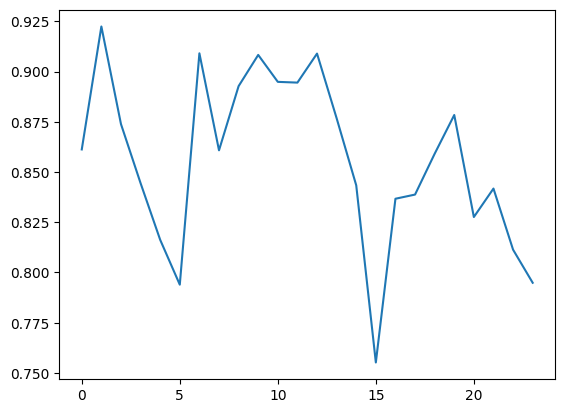

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prediction[0, :, -1])
plt.show()

### More details about Prediction - prediction dataset

You can give a `root_path` and `data_path` of the data you want to forecast, and set `seq_len`, `label_len`, `pred_len` and other arguments as other Dataset. The difference is that you can set a more detailed freq such as `15min` or `3h` to generate the timestamp of prediction series.

`Dataset_Pred` only has one sample (including `encoder_input: [1, seq_len, dim]`, `decoder_token: [1, label_len, dim]`, `encoder_input_timestamp: [1, seq_len, date_dim]`, `decoder_input_timstamp: [1, label_len+pred_len, date_dim]`). It will intercept the last sequence of the given data (seq_len data) to forecast the unseen future sequence (pred_len data).